# Darsh Patel

In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

c:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# DATA-DESCRIPTION STATISTICS

What is the structure (shape) of the dataset?

In [4]:
df = pd.read_csv('diabetes-case-study.csv')
df.shape

(768, 9)

Show the min, max, and mean of Glucose, …?

In [36]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Profiling Data for an overview

In [37]:
pandas_profiling.ProfileReport(df, minimal = True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Pre-processing

Check for NULLs/Duplicates. Drop attributes with more than 20% data missing.

In [50]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


#Since no duplicate values hence data remains same and no data is stored in the duplicate variable

#From the dataset after profiling we got Insulin and SkinThcinkess having null values with 20% data missing so dropping those columns

In [6]:
df.drop(['Insulin','SkinThickness'],axis='columns',inplace=True)


In [87]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [66]:
df

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,1,137,40,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,76,32.9,0.171,63,0
764,2,122,70,36.8,0.340,27,0
765,5,121,72,26.2,0.245,30,0
766,1,126,60,30.1,0.349,47,1


Fill remaining NULLs with mode values

In [5]:
df['Pregnancies'].replace(0, df['Pregnancies'].mode()[0], inplace=True)
df['Glucose'].replace(0, df['Glucose'].mode()[0], inplace=True)
df['BloodPressure'].replace(0, df['BloodPressure'].mode()[0], inplace=True)
df['BMI'].replace(0, df['BMI'].mode()[0], inplace=True)
df['DiabetesPedigreeFunction'].replace(0, df['DiabetesPedigreeFunction'].mode()[0], inplace=True)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.989583,121.539062,72.295573,32.450911,0.471876,33.240885,0.348958
std,3.219464,30.490660,12.106756,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000


Are there categorical columns ?

Since the dataset contains all numeric values hence there are no categorical columns.

# Data-Visualization

Make Histogram, and whisker plots to understand the meaning of the encoding.

<AxesSubplot:>

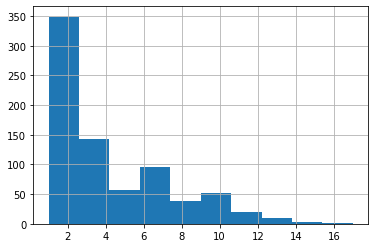

In [56]:
df['Pregnancies'].hist()

<AxesSubplot:>

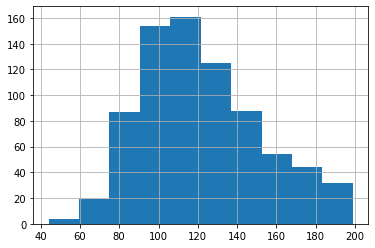

In [57]:
df['Glucose'].hist()

<AxesSubplot:>

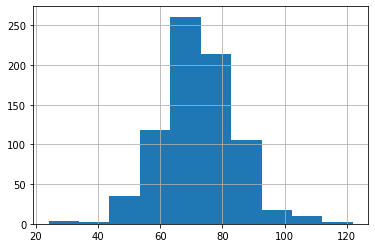

In [58]:
df['BloodPressure'].hist()

<AxesSubplot:>

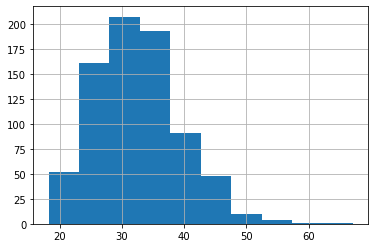

In [61]:
df['BMI'].hist()

<AxesSubplot:>

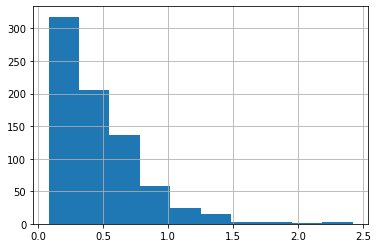

In [62]:
df['DiabetesPedigreeFunction'].hist()

<AxesSubplot:>

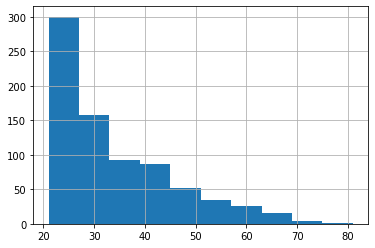

In [63]:
df['Age'].hist()

<AxesSubplot:>

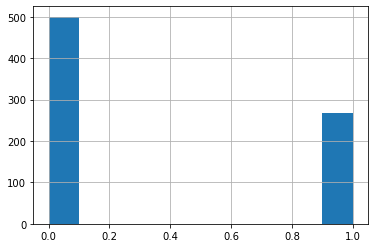

In [64]:
df['Outcome'].hist()

<AxesSubplot:>

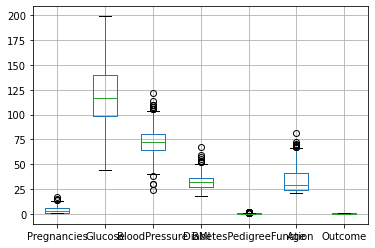

In [68]:
df.boxplot()

# Hypothesis Testing

Perform correlation Analysis.

In [70]:
df.corr()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.137364,0.222988,0.040230,-0.028443,0.548175,0.231621
Glucose,0.137364,1.000000,0.220825,0.230762,0.138156,0.267969,0.491524
BloodPressure,0.222988,0.220825,1.000000,0.281276,-0.000478,0.326264,0.163875
BMI,0.040230,0.230762,0.281276,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.028443,0.138156,-0.000478,0.153506,1.000000,0.033561,0.173844
Age,0.548175,0.267969,0.326264,0.025744,0.033561,1.000000,0.238356
Outcome,0.231621,0.491524,0.163875,0.312249,0.173844,0.238356,1.000000


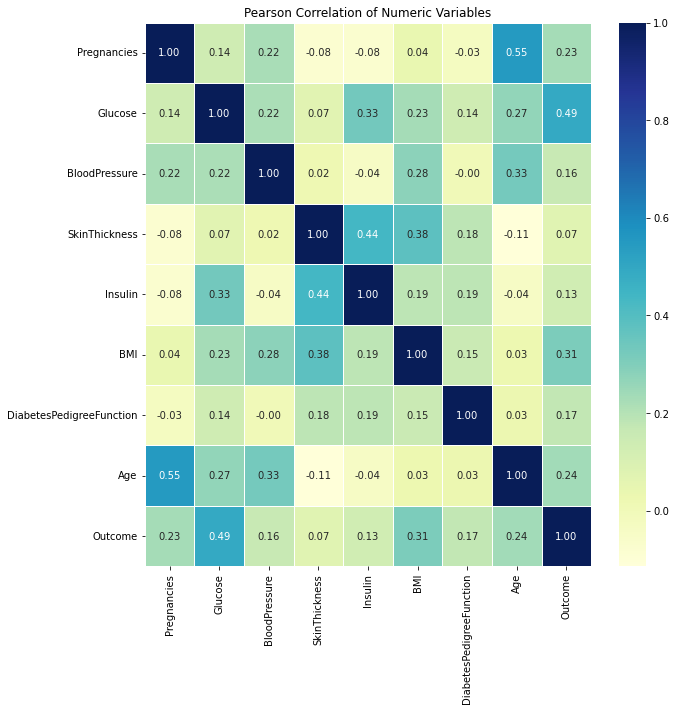

In [72]:
plt.figure(figsize=(10,10))
num_corr = df.corr(method = 'pearson')
ax = sns.heatmap(num_corr, annot=True, cmap="YlGnBu", linewidths=.5, fmt = '.2f').set(title = 'Pearson Correlation of Numeric Variables')

#Heat map is shown above after performing co-relation

<AxesSubplot:>

<Figure size 720x720 with 0 Axes>

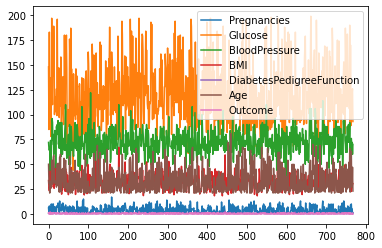

In [74]:
plt.figure(figsize=(10,10))
df.plot()

# Modelling

MAE, MSE, and RMSE results.
Linear Regression R2 score.


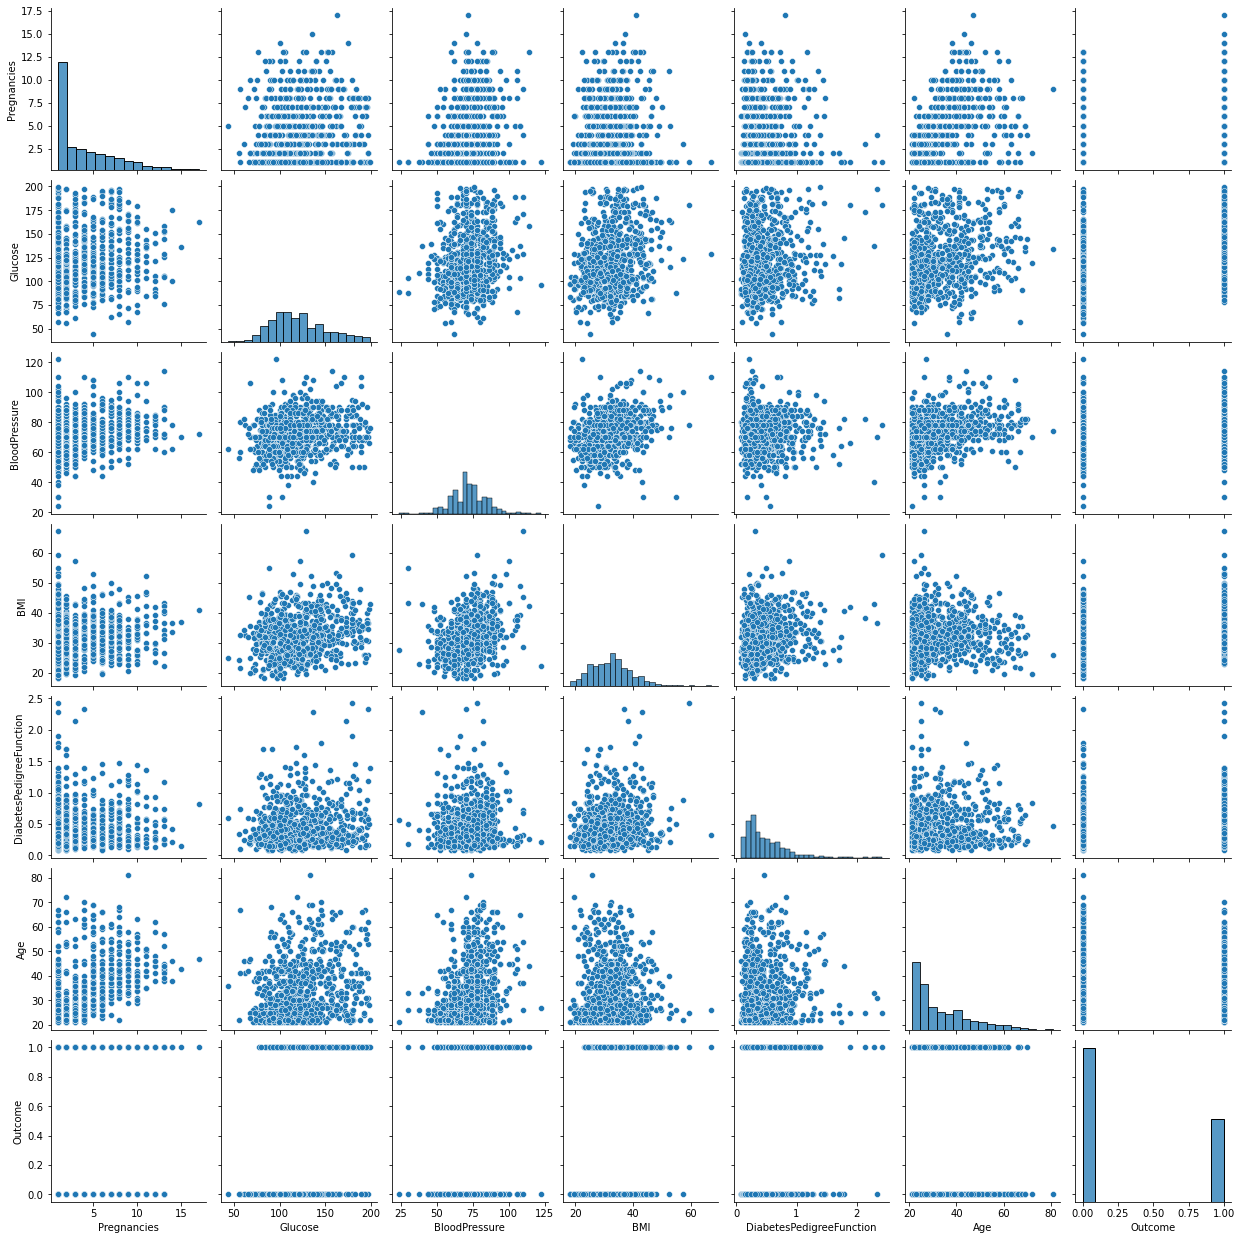

In [76]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [77]:
my_array = df.to_numpy()
my_array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [4]:
x= np.array(df["Pregnancies"])
y= np.array(df["Age"])

In [5]:
model=LinearRegression()

In [6]:
X=x.reshape(-1,1)
Y = y.reshape(-1,1)

In [7]:
model.fit(X,Y)

LinearRegression()

In [8]:
print("Model Score:-")
print(model.score(X,Y))

print("Intercept:-")
print(model.intercept_)

print("Model Slope:-")
print(model.coef_)

Model Score:-
0.29630737293856724
Intercept:-
[25.9359933]
Model Slope:-
[[1.89981617]]


In [9]:
y_predict=model.predict(X)
# MAE
print("MAE:",metrics.mean_absolute_error(y, y_predict))
# MSE
print("MSE",metrics.mean_squared_error(y, y_predict))
# RMSE
print("RMSE",np.sqrt(metrics.mean_squared_error(y, y_predict)))
# R2
print("R2-score",metrics.r2_score(y,y_predict))

MAE: 7.174516824080683
MSE 97.19611125349032
RMSE 9.858808815140414
R2-score 0.29630737293856724
